# EXPLORATORY DATA ANALYSIS

This is a critical process of performing initial investigations on the cleaned data to discover patterns, spot anomalies and to check assumptions with the help of summary statistics and graphical representations.

# QUESTIONS ABOUT THE DATA

<ul>
	<li>Which neighborhood has the most Airbnb listings? Which one has the least?</li>
    <li>What is the distribution of price?</li>
    <li>What is the distribution of price for each neighborhood?</li>
	<li>What is the distribution of room_type?</li>
	<li>Which room_type gets booked the most which gets booked the least?</li>
    <li>What is the average price for each room_type?</li>
    <li>What is the distribution of price for each room_type?</li>
	<li>What number of bedrooms, bathrooms, beds and accommodates get booked the most?</li>
    <li>What is the distribution of price for bedrooms, bathrooms, beds and accommodates?</li>
    <li>What is the average price of listings with the same amount of bedrooms, bathrooms, beds and accommodates?</li>
	<li>How does review_scores_rating relate to price?</li>
    <li>How does review_scores_rating relate to number_of_bookings?</li>
    <li>What is the distribution of review_scores_rating?</li>
	<li>What is the distribution of minimum nights? Does it affect number of bookings?</li>
    <li>How does bedroom_bath_ratio relate to price?</li>
    <li>How does bedroom_bath_ratio related to the number_of_bookings?</li>
    <li>What is the distribution of bedroom_bath_ratio?</li>
	<li>How is price distributed on the map (by neighborhoods)?</li>
</ul>

I will use statistics and data visualization to explore and answer the questions above.

In [17]:
# Import required libraries
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import pymc3
import numpy

# Read in the csv file
df = pd.read_csv('Data/airbnb_clean.csv')
df.head()

listing_id  zip_code  latitude  longitude        room_type  accommodates  \
0        2265     78702  30.27750  -97.71398  Entire home/apt             4   
1        5245     78702  30.27577  -97.71379     Private room             2   
2        5456     78702  30.26112  -97.73448  Entire home/apt             3   
3       75174     78702  30.24773  -97.72584  Entire home/apt             3   
4       76911     78702  30.26775  -97.72695  Entire home/apt            10   

   bathrooms  bedrooms  beds  price  minimum_nights  number_of_reviews  \
0        2.0       2.0   2.0  225.0              30                 24   
1        1.0       1.0   2.0  100.0              30                  9   
2        1.0       1.0   2.0   95.0               2                499   
3        1.0       1.0   1.0  130.0               2                249   
4        3.0       5.0  12.0  821.0               2                126   

   review_scores_rating  neighbourhood  number_of_bookings  bedroom_bath_ratio  
0                  93.0  East Downtown               365.0               100.0  
1                  91.0  East Downtown               354.0               100.0  
2                  96.0  East Downtown                74.0               100.0  
3                  98.0  East Downtown               131.0               100.0  
4                  99.0  East Downtown                56.0                60.0

In [18]:
df['room_type'] = df['room_type'].astype('category')
print(df['room_type'].dtype)
df.info()

category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 16 columns):
listing_id              11333 non-null int64
zip_code                11333 non-null int64
latitude                11333 non-null float64
longitude               11333 non-null float64
room_type               11333 non-null category
accommodates            11333 non-null int64
bathrooms               11333 non-null float64
bedrooms                11333 non-null float64
beds                    11333 non-null float64
price                   11333 non-null float64
minimum_nights          11333 non-null int64
number_of_reviews       11333 non-null int64
review_scores_rating    11333 non-null float64
neighbourhood           11333 non-null object
number_of_bookings      11333 non-null float64
bedroom_bath_ratio      11333 non-null float64
dtypes: category(1), float64(9), int64(5), object(1)
memory usage: 1.3+ MB


In [19]:
df['neighbourhood'] = df['neighbourhood'].astype('category')
print(df['neighbourhood'].dtype)
df.info()

category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 16 columns):
listing_id              11333 non-null int64
zip_code                11333 non-null int64
latitude                11333 non-null float64
longitude               11333 non-null float64
room_type               11333 non-null category
accommodates            11333 non-null int64
bathrooms               11333 non-null float64
bedrooms                11333 non-null float64
beds                    11333 non-null float64
price                   11333 non-null float64
minimum_nights          11333 non-null int64
number_of_reviews       11333 non-null int64
review_scores_rating    11333 non-null float64
neighbourhood           11333 non-null category
number_of_bookings      11333 non-null float64
bedroom_bath_ratio      11333 non-null float64
dtypes: category(2), float64(9), int64(5)
memory usage: 1.2 MB


<b>Which neighborhood has the most Airbnb listings? Which one has the least?</b>

Text(0.5, 0, 'Number of Listings')

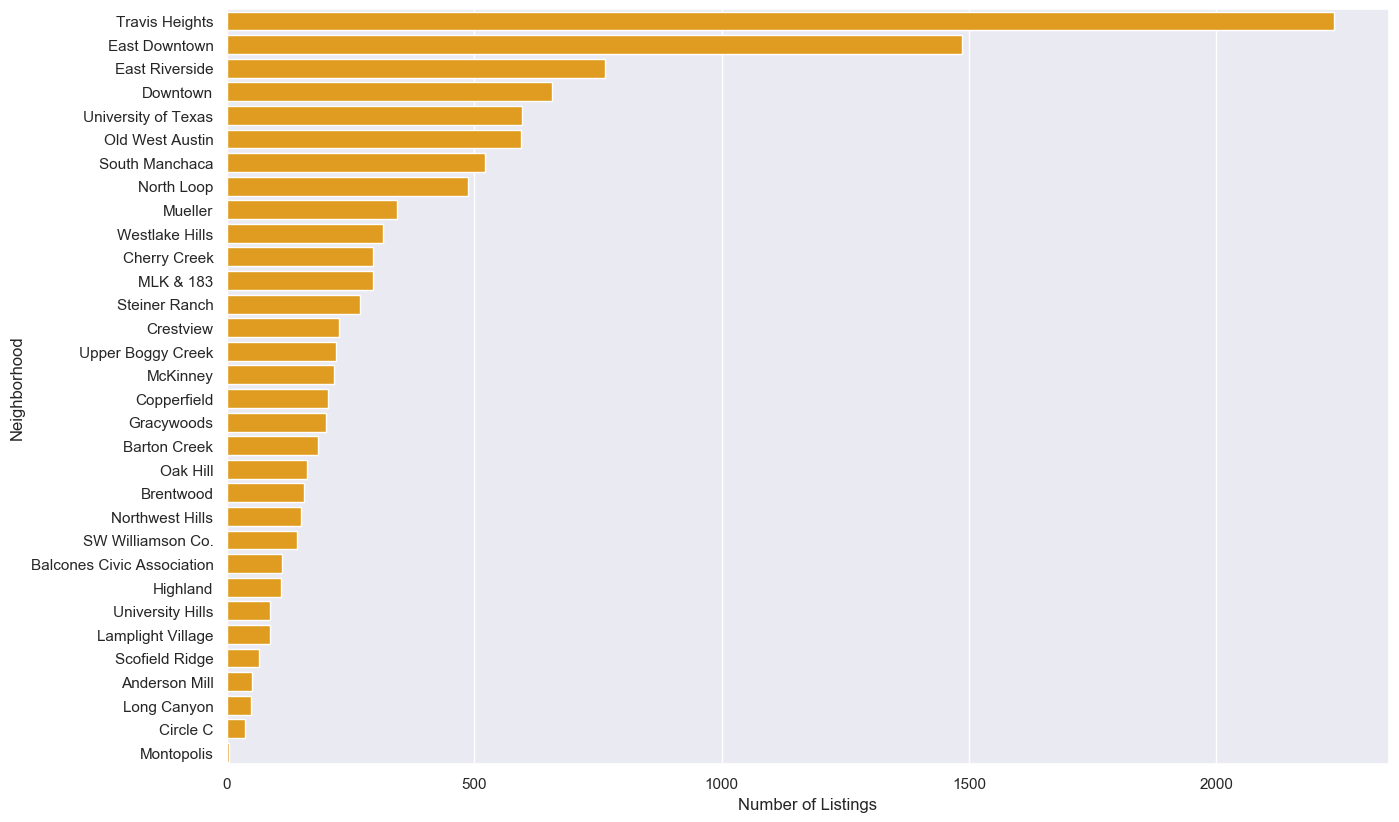

In [20]:
sns.set()
fig=plt.figure(figsize=(15,10), dpi=100)
sns.countplot(y='neighbourhood', data=df, color='orange', order=df['neighbourhood'].value_counts().index)
plt.ylabel("Neighborhood")
plt.xlabel("Number of Listings")

Travis Heights neighborhood has the most listings and Montopolis has the least.

<b>What is the distribution of price?</b>

Text(0.5, 0, 'Price')

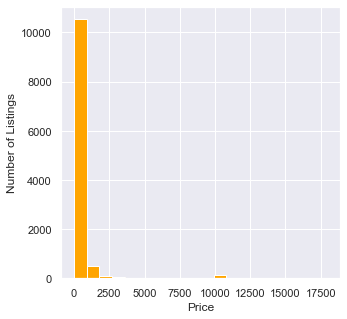

In [21]:
plt.figure(figsize=(5,5))
plt.hist(df['price'], color='orange', bins=20)
plt.ylabel('Number of Listings')
plt.xlabel('Price')

Most of the listings fall under $2500. I will take a closer look with the describe function.

In [22]:
# Check the summary statistics of price
df['price'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count    11333.000000
mean       390.907968
std       1129.091623
min          1.000000
25%         80.000000
50%        145.000000
75%        300.000000
90%        669.000000
max      17999.000000
Name: price, dtype: float64

Since 90% of the listings are below $669, I will take a closer look at listings up to that amount.

Text(0.5, 0, 'Price')

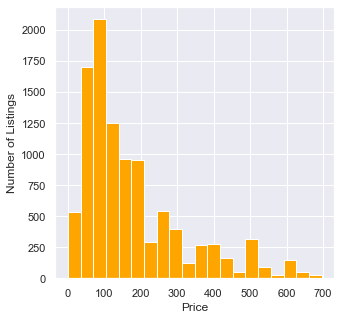

In [23]:
plt.figure(figsize=(5,5))
new_df = df[df['price'] < 699]
plt.hist(new_df['price'], color='orange', bins=20)
plt.ylabel('Number of Listings')
plt.xlabel('Price')

It looks like most of the listings fall below $200 a night. 

<b>What is the distribution of price for each neighborhood?</b>

Text(0.5, 0, 'Price')

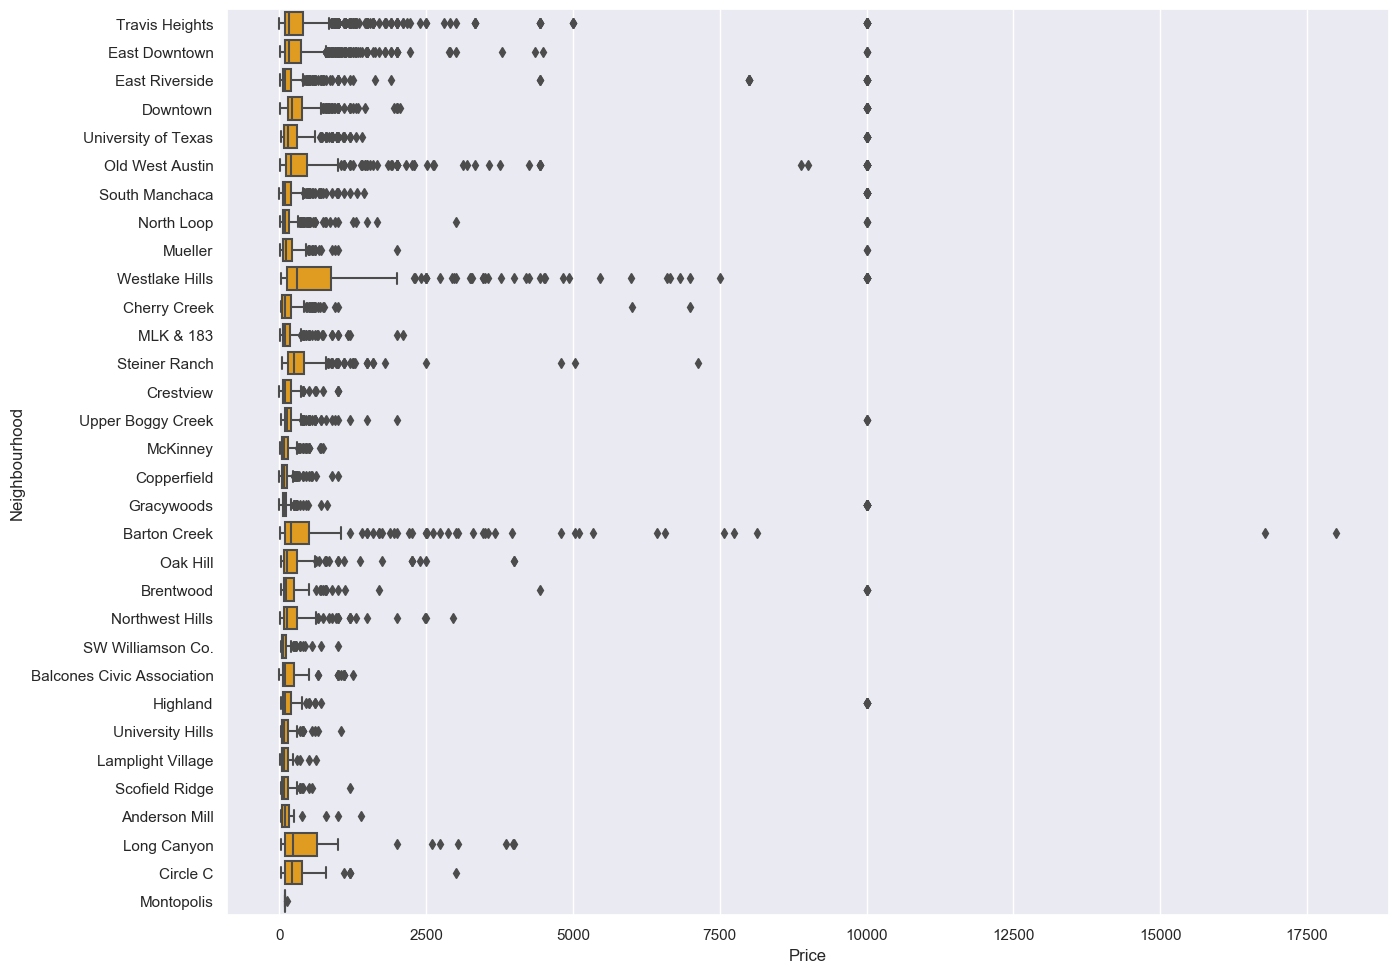

In [24]:
fig=plt.figure(figsize=(15,12), dpi=100)
sns.boxplot(y='neighbourhood', x='price', data=df, orient='h', color='orange', order=df['neighbourhood'].value_counts().index)
plt.ylabel("Neighbourhood")
plt.xlabel("Price")

It seems the bulk of listings in neighborhoods Barton Creek and Westlake Hills are typically priced higher than the rest.

<b>What is the distribution of room_type?</b>

Text(0.5, 0, 'Number of Listings')

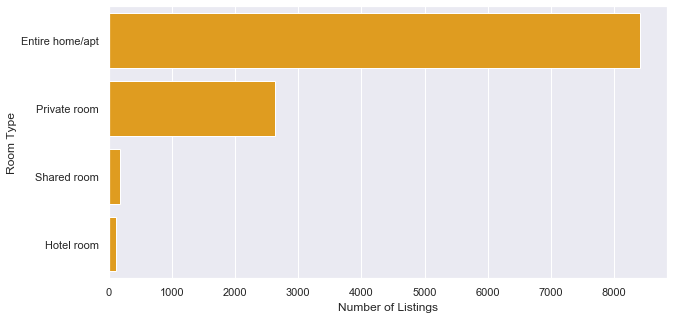

In [25]:
fig=plt.figure(figsize=(10,5))
sns.countplot(y='room_type', data=df, color='orange', order=df['room_type'].value_counts().index)
plt.ylabel("Room Type")
plt.xlabel("Number of Listings")

The majority of listings are of the entire home/apt room_type. Hotel room has the least amount. 

<b>Which room_type gets booked the most which gets booked the least?</b>

In [26]:
# Calculate the percentage of bookings in the past year, for each listing, and put it into a new column
df['percentage_booked'] = (df['number_of_bookings'] / 365) * 100

# Create a groupby variable that groups percentage_booked values by room_type
groupby_room_type = df['percentage_booked'].groupby(df['room_type'])

# Get the mean of percentage_booked grouped by room_type
room_type_mean = groupby_room_type.mean().sort_values(ascending=True)

# Inspect the calculations
room_type_mean

room_type
Hotel room         32.912140
Shared room        60.544918
Entire home/apt    62.093049
Private room       71.433978
Name: percentage_booked, dtype: float64

(0, 100)

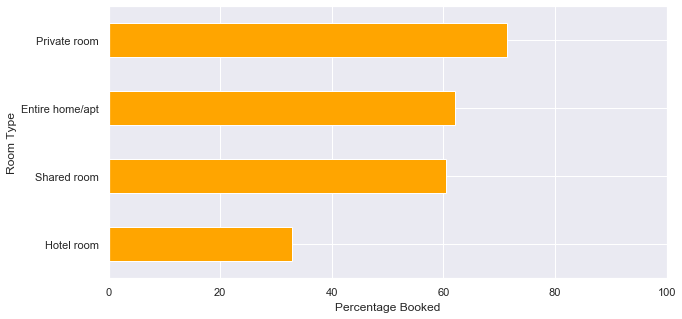

In [27]:
plt.figure(figsize=(10,5))
room_type_mean.plot.barh(color='orange')
plt.xlabel('Percentage Booked')
plt.ylabel('Room Type')
plt.xlim(0, 100)

It looks like private room gets booked the most, around 70 percent. Entire home/apt and shared room are not far behind, around 60 percent. Hotel room gets booked the least, around 30 percent.

<b>What is the average price for each room_type?</b>

In [28]:
# Create a groupby variable that groups price values by room_type
groupby_room_type = df['price'].groupby(df['room_type'])

# Get the mean of prices grouped by room_type
price_mean = groupby_room_type.mean().sort_values(ascending=True)

# Inspect the calculations
price_mean

room_type
Shared room         72.044199
Private room       107.075723
Entire home/apt    484.886299
Hotel room         506.905172
Name: price, dtype: float64

Text(0, 0.5, 'Room Type')

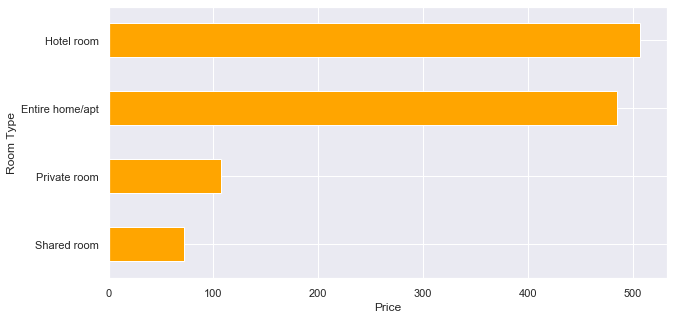

In [29]:
plt.figure(figsize=(10,5))
price_mean.plot.barh(color='orange')
plt.xlabel('Price')
plt.ylabel('Room Type')

Hotel and entire home/apt have the highest average prices. The average price of hotel and entire home/apt are 3 to 4 times larger than the average price of private room. The average price of a shared room is about 25% cheaper than private room.

<b>What is the distribution of price for each room_type?</b>

Text(0.5, 0, 'Price')

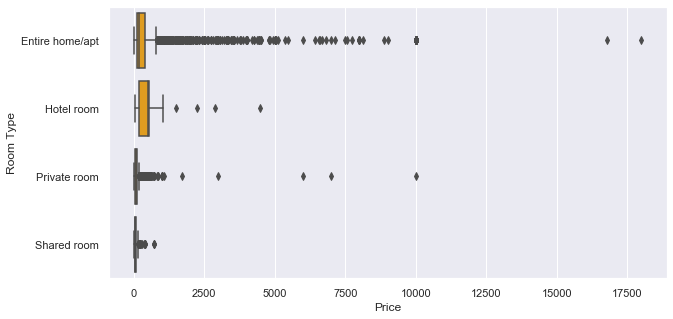

In [30]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(x='price', y='room_type', data=df, color='orange')
plt.ylabel("Room Type")
plt.xlabel("Price")

There are many outliers in the above graph and the significant difference in price range between each room_type makes it hard to distinguish the bulk of prices for each one. I will take a closer look at the price distribution of each room_type separately. I will create a new data frame with only listing_id, room_type and price columns. Then I will reshape the data frame so that each value within room_type is its own column and the values are the prices. 

In [31]:
# Select only relevant columns
room_type = df[['listing_id', 'room_type', 'price']]

# Pivot table to make room_type values the columns
room_type = room_type.pivot(index='listing_id', columns='room_type', values='price')
room_type

room_type   Entire home/apt  Hotel room  Private room  Shared room
listing_id                                                        
2265                  225.0         NaN           NaN          NaN
5245                    NaN         NaN         100.0          NaN
5456                   95.0         NaN           NaN          NaN
5769                    NaN         NaN          40.0          NaN
6413                   99.0         NaN           NaN          NaN
...                     ...         ...           ...          ...
38726612              400.0         NaN           NaN          NaN
38727516               55.0         NaN           NaN          NaN
38728146                NaN         NaN          50.0          NaN
38728874              455.0         NaN           NaN          NaN
38732317                NaN         NaN          43.0          NaN

[11333 rows x 4 columns]

In [32]:
# Check the price values at different percentiles
room_type['Entire home/apt'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count     8408.000000
mean       484.886299
std       1285.057820
min          1.000000
25%        105.000000
50%        179.000000
75%        385.000000
90%        836.500000
max      17999.000000
Name: Entire home/apt, dtype: float64

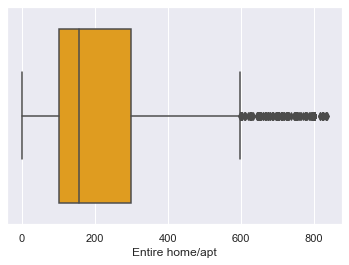

In [33]:
# Select only values below the 90% percentile
entire_homeapt = room_type[room_type['Entire home/apt'] < 836]

# Plot the values
sns.boxplot(entire_homeapt['Entire home/apt'], color='orange')

Based on the box plot above, most of the room_type of value entire_home/apt are between 100 to 300 dollars. Next I will check hotel room.

In [34]:
# Check the price values at different percentiles
room_type['Hotel room'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count     116.000000
mean      506.905172
std       565.049932
min        27.000000
25%       175.000000
50%       489.000000
75%       543.500000
90%       989.000000
max      4485.000000
Name: Hotel room, dtype: float64

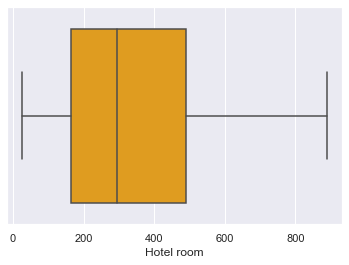

In [35]:
# Select only values below the 90% percentile
hotel_room = room_type[room_type['Hotel room'] < 989]

# Plot the values
sns.boxplot(hotel_room['Hotel room'], color='orange')

Based on the box plot above, most of the room_type of value hotel room are between 150 to 500 dollars. Next I will check private room.

In [36]:
# Check the price values at different percentiles
room_type['Private room'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count     2628.000000
mean       107.075723
std        288.558042
min          1.000000
25%         45.000000
50%         65.000000
75%        100.000000
90%        200.000000
max      10000.000000
Name: Private room, dtype: float64

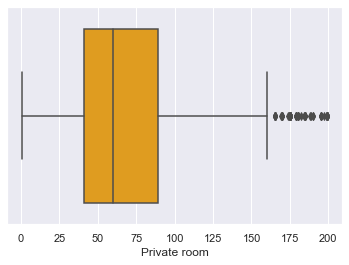

In [37]:
# Select only values below the 90% percentile
private_room = room_type[room_type['Private room'] < 200]

# Plot the values
sns.boxplot(private_room['Private room'], color='orange')

Based on the box plot above, most of the room_type of value private room are between 37 to 88 dollars. Next I will check shared room.

In [38]:
# Check the price values at different percentiles
room_type['Shared room'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count    181.000000
mean      72.044199
std      107.643590
min       14.000000
25%       23.000000
50%       35.000000
75%       75.000000
90%      150.000000
max      700.000000
Name: Shared room, dtype: float64

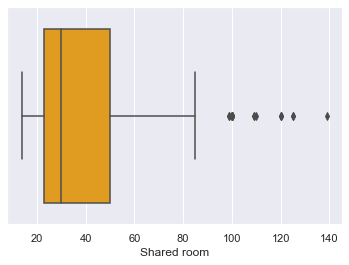

In [39]:
# Select only values below the 90% percentile
shared_room = room_type[room_type['Shared room'] < 150]

# Plot the values
sns.boxplot(shared_room['Shared room'], color='orange')

Based on the box plot above, most of the room_type of value shared room are between 20 to 50 dollars. 

<b>What number of bedrooms, bathrooms, beds and accommodates get booked the most?</b>

In [40]:
# Create a groupby variable that groups percentage_booked values by bedrooms 
groupby_bedrooms = df['percentage_booked'].groupby(df['bedrooms'])

# Get the mean of percentage_booked grouped by bedrooms
bedrooms_mean = groupby_bedrooms.mean().sort_values(ascending=True)

# Inspect the calculations
bedrooms_mean

bedrooms
9.0      8.383562
7.0     17.093933
12.0    18.630137
10.0    19.921722
13.0    20.821918
14.0    27.397260
8.0     27.968037
6.0     30.565265
15.0    32.876712
5.0     33.882043
23.0    37.260274
4.0     47.681380
3.0     61.459187
2.0     63.793538
0.0     66.970473
1.0     68.736682
Name: percentage_booked, dtype: float64

(0, 100)

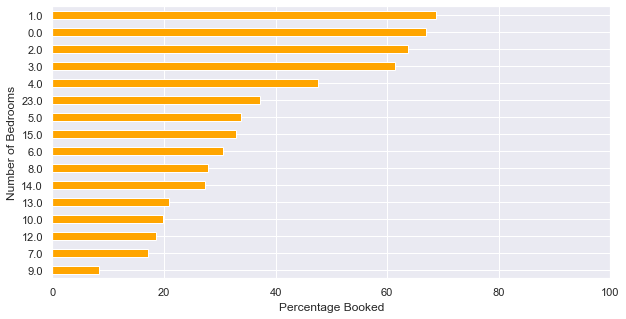

In [41]:
plt.figure(figsize=(10,5))
bedrooms_mean.plot.barh(color='orange')
plt.xlabel('Percentage Booked')
plt.ylabel('Number of Bedrooms')
plt.xlim(0, 100)

Listings that have 0 to 3 bedrooms have a significantly higher booking rate than all of the other bedrooms.

In [42]:
# Create a groupby variable that groups percentage_booked values by bathrooms 
groupby_bathrooms = df['percentage_booked'].groupby(df['bathrooms'])

# Get the mean of percentage_booked grouped by bathrooms
bathrooms_mean = groupby_bathrooms.mean().sort_values(ascending=True)

# Inspect the calculations
bathrooms_mean

bathrooms
7.00     12.328767
3.25     13.972603
6.50     16.310502
9.00     20.821918
6.00     24.720759
5.00     28.195354
5.50     30.308219
3.75     31.068493
4.00     31.247392
11.00    32.876712
5.75     35.342466
17.00    37.260274
7.50     38.812785
8.00     42.237443
0.00     46.893504
4.50     48.552160
3.00     50.081515
3.50     51.048680
2.00     59.172605
2.50     61.076005
1.50     66.385084
1.00     68.417090
0.50     88.809273
Name: percentage_booked, dtype: float64

(0, 100)

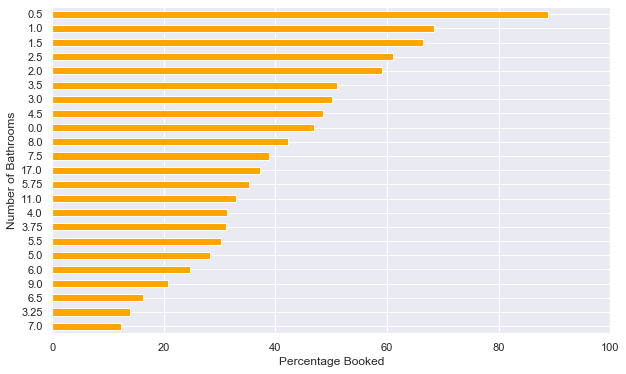

In [43]:
plt.figure(figsize=(10, 6))
bathrooms_mean.plot.barh(color='orange')
plt.xlabel('Percentage Booked')
plt.ylabel('Number of Bathrooms')
plt.xlim(0, 100)

Listings that have 0.5 bathrooms get booked the most. 

In [44]:
# Create a groupby variable that groups percentage_booked values by beds
groupby_beds = df['percentage_booked'].groupby(df['beds'])

# Get the mean of percentage_booked grouped by beds
beds_mean = groupby_beds.mean().sort_values(ascending=True)

# Inspect the calculations
beds_mean

beds
23.0      4.109589
22.0      6.301370
33.0      7.671233
24.0      8.630137
25.0      8.767123
17.0      8.767123
18.0      9.908676
30.0     10.136986
11.0     11.413699
28.0     12.876712
16.0     14.246575
12.0     14.559687
15.0     15.232877
26.0     15.273973
14.0     16.733404
19.0     22.054795
13.0     24.919595
132.0    27.397260
9.0      31.809661
39.0     32.876712
61.0     37.260274
10.0     37.922991
8.0      43.149301
7.0      43.478568
6.0      51.053174
5.0      52.047149
4.0      59.392006
3.0      60.529744
0.0      60.811771
36.0     61.095890
2.0      66.221364
1.0      70.899028
Name: percentage_booked, dtype: float64

(0, 100)

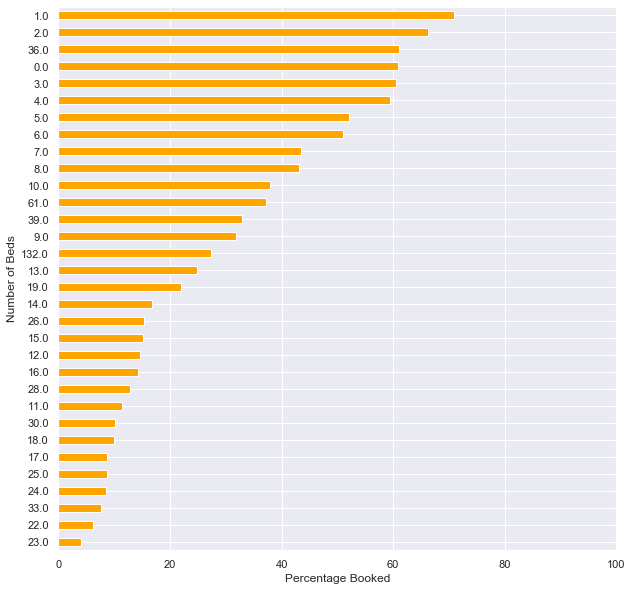

In [45]:
plt.figure(figsize=(10,10))
beds_mean.plot.barh(color='orange')
plt.xlabel('Percentage Booked')
plt.ylabel('Number of Beds')
plt.xlim(0, 100)

Listings that have 1 or 2 beds get booked the most.

In [46]:
# Create a groupby variable that groups percentage_booked values by accommodates
groupby_accommodates = df['percentage_booked'].groupby(df['accommodates'])

# Get the mean of percentage_booked grouped by beds
accommodates_mean = groupby_accommodates.mean().sort_values(ascending=True)

# Inspect the calculations
accommodates_mean

accommodates
25     3.835616
18     7.945205
30     8.630137
19    10.958904
24    11.232877
21    12.534247
20    13.947696
32    16.164384
28    17.671233
17    17.808219
16    22.411650
15    31.580611
14    33.526886
12    39.605294
10    43.742617
13    48.513445
11    50.182648
9     57.704718
8     58.463811
6     62.182620
4     63.742941
1     64.584848
7     67.894592
2     71.096592
5     71.173793
3     72.409768
Name: percentage_booked, dtype: float64

(0, 100)

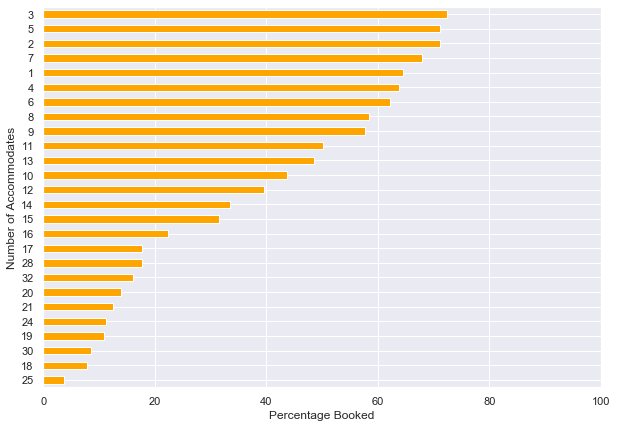

In [47]:
plt.figure(figsize=(10,7))
accommodates_mean.plot.barh(color='orange')
plt.xlabel('Percentage Booked')
plt.ylabel('Number of Accommodates')
plt.xlim(0, 100)

Listings that can accommodate 3 people gets booked the most. Those that can accommodate 5, 2 or 7 people are not very far behind.

<b>What is the distribution of price for bedrooms, bathrooms, beds and accommodates?</b>

Text(0.5, 0, 'Price')

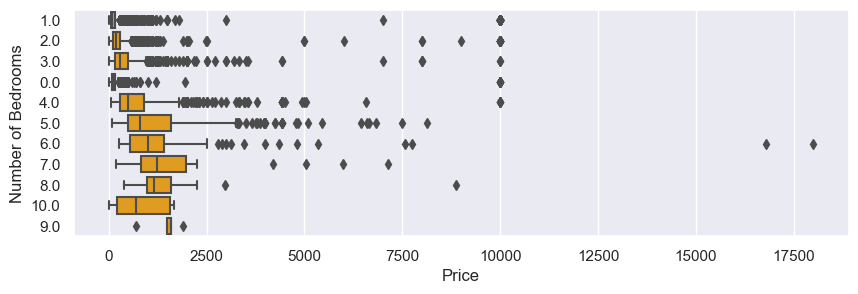

In [48]:
# Omit number of bedrooms if there is only 1 total listing with that number of bedrooms
vc = df['bedrooms'].value_counts()
u  = [i not in set(vc[vc==1].index) for i in df['bedrooms']]
bedroom_df = df[u]

# Plot the distribution
fig=plt.figure(figsize=(10,3), dpi=100)
sns.boxplot(y='bedrooms', x='price', data=df, orient='h', color='orange', order=bedroom_df['bedrooms'].value_counts().index)
plt.ylabel("Number of Bedrooms")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

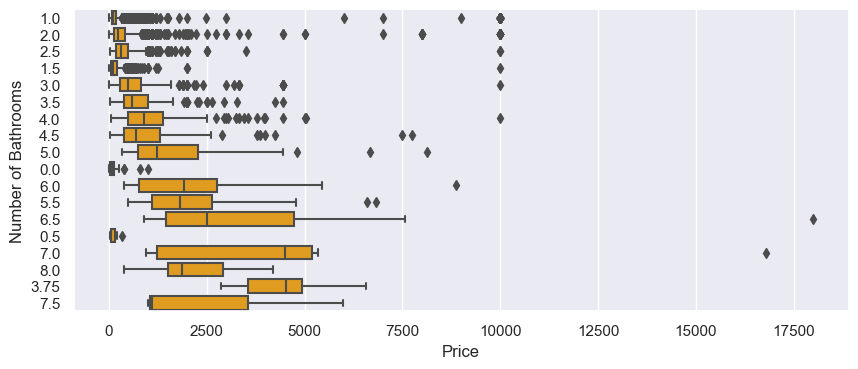

In [49]:
# Omit number of bathrooms if there is only 1 total listing with that number of bathrooms
vc = df['bathrooms'].value_counts()
u  = [i not in set(vc[vc==1].index) for i in df['bathrooms']]
bathrooms_df = df[u]

# Plot the distribution
fig=plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(y='bathrooms', x='price', data=df, orient='h', color='orange', order=bathrooms_df['bathrooms'].value_counts().index)
plt.ylabel("Number of Bathrooms")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

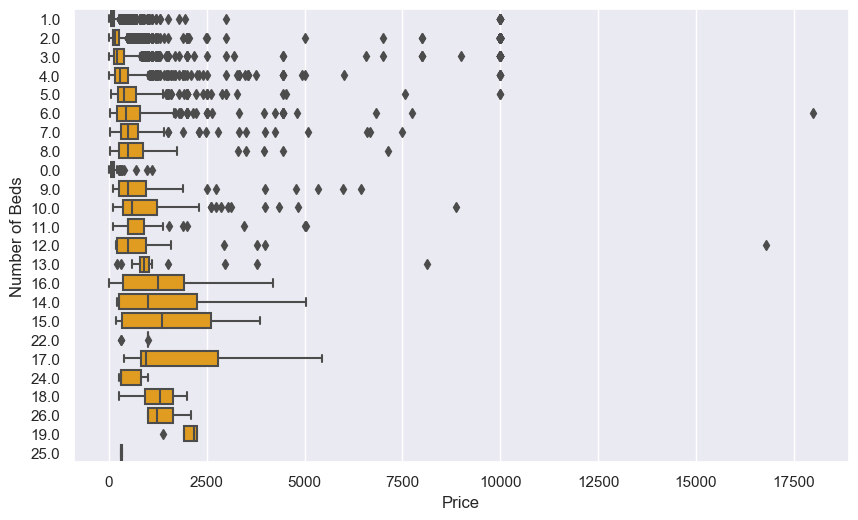

In [50]:
# Omit number of beds if there is only 1 total listing with that number of beds
vc = df['beds'].value_counts()
u  = [i not in set(vc[vc==1].index) for i in df['beds']]
beds_df = df[u]

# Plot the distribution
fig=plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(y='beds', x='price', data=df, orient='h', color='orange', order=beds_df['beds'].value_counts().index)
plt.ylabel("Number of Beds")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

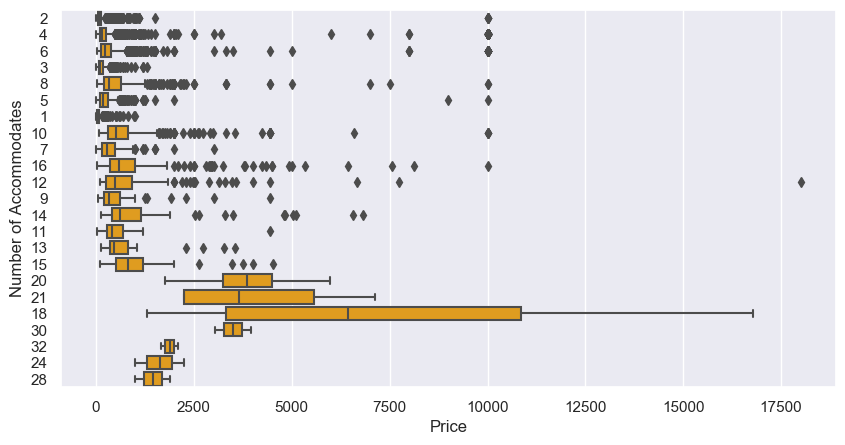

In [51]:
# Omit number of accommodates if there is only 1 total listing with that number of accommodates
vc = df['accommodates'].value_counts()
u  = [i not in set(vc[vc==1].index) for i in df['accommodates']]
accommodates_df = df[u]

fig=plt.figure(figsize=(10,5), dpi=100)
sns.boxplot(y='accommodates', x='price', data=df, orient='h', color='orange', order=accommodates_df['accommodates'].value_counts().index)
plt.ylabel("Number of Accommodates")
plt.xlabel("Price")

<b>What is the average price of listings with the same amount of bedrooms, bathrooms, beds and accommodates?</b>

In [52]:
# Create a groupby variable that groups price values by bedrooms 
groupby_bedrooms = df['price'].groupby(df['bedrooms'])

# Get the mean of price grouped by bedrooms
bedrooms_mean = groupby_bedrooms.mean()

# Inspect the calculations
bedrooms_mean

bedrooms
0.0      233.593438
1.0      290.605499
2.0      347.426009
3.0      421.109536
4.0      805.611852
5.0     1383.393305
6.0     1756.689655
7.0     1789.535714
8.0     1910.333333
9.0     1458.000000
10.0     844.285714
12.0    2100.000000
13.0    2100.000000
14.0    4500.000000
15.0    2893.000000
23.0    4485.000000
Name: price, dtype: float64

Text(0, 0.5, 'Number of Bedrooms')

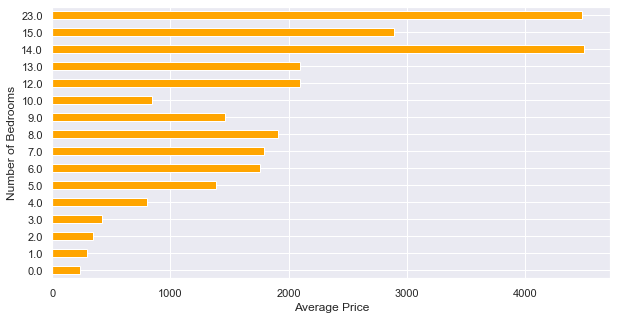

In [53]:
plt.figure(figsize=(10,5))
bedrooms_mean.plot.barh(color='orange')
plt.xlabel('Average Price')
plt.ylabel('Number of Bedrooms')

In [54]:
# Create a groupby variable that groups price values by bathrooms 
groupby_bathrooms = df['price'].groupby(df['bathrooms'])

# Get the mean of price grouped by bathrooms
bathrooms_mean = groupby_bathrooms.mean()

# Inspect the calculations
bathrooms_mean

bathrooms
0.00      146.354839
0.50      103.153846
1.00      298.581701
1.50      179.490278
2.00      420.213539
2.50      427.481183
3.00      718.002469
3.25     3470.000000
3.50      839.288136
3.75     4490.400000
4.00     1196.158940
4.50     1198.523077
5.00     1845.173913
5.50     2271.125000
5.75     6437.000000
6.00     2259.038462
6.50     4063.066667
7.00     5007.571429
7.50     2699.000000
8.00     2163.000000
9.00     2100.000000
11.00    2893.000000
17.00    4485.000000
Name: price, dtype: float64

Text(0, 0.5, 'Number of Bathrooms')

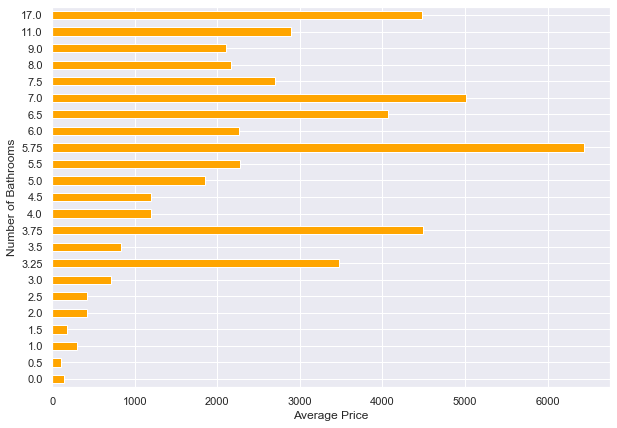

In [55]:
plt.figure(figsize=(10,7))
bathrooms_mean.plot.barh(color='orange')
plt.xlabel('Average Price')
plt.ylabel('Number of Bathrooms')

In [56]:
# Create a groupby variable that groups price values by beds 
groupby_beds = df['price'].groupby(df['beds'])

# Get the mean of price grouped by beds
beds_mean = groupby_beds.mean()

# Inspect the calculations
beds_mean

beds
0.0       140.604938
1.0       141.985475
2.0       497.025467
3.0       462.507576
4.0       537.129514
5.0       625.825581
6.0       809.964158
7.0       804.367742
8.0       770.383838
9.0       915.736842
10.0     1125.500000
11.0      865.420000
12.0     1200.285714
13.0     1373.260870
14.0     1468.461538
15.0     1623.800000
16.0     1357.062500
17.0     2002.142857
18.0     1232.166667
19.0     1998.750000
22.0      838.333333
23.0      989.000000
24.0      520.666667
25.0      324.000000
26.0     1390.750000
28.0      499.000000
30.0      399.000000
33.0      499.000000
36.0     2899.000000
39.0     2893.000000
61.0     4485.000000
132.0    4500.000000
Name: price, dtype: float64

Text(0, 0.5, 'Number of Beds')

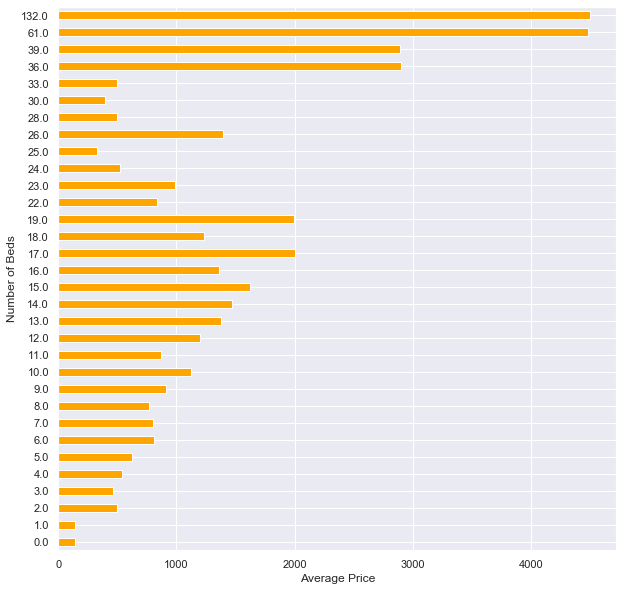

In [57]:
plt.figure(figsize=(10,10))
beds_mean.plot.barh(color='orange')
plt.xlabel('Average Price')
plt.ylabel('Number of Beds')

In [58]:
# Create a groupby variable that groups price values by accommodates 
groupby_accommodates = df['price'].groupby(df['accommodates'])

# Get the mean of price grouped by accommodates
accommodates_mean = groupby_accommodates.mean()

# Inspect the calculations
accommodates_mean

accommodates
1       76.744898
2      127.481102
3      143.165217
4      571.428229
5      279.977636
6      439.650774
7      355.377510
8      560.805022
9      517.888889
10     800.245413
11     578.214286
12     925.564972
13     859.074074
14    1217.880597
15    1312.423077
16    1035.911765
17    1170.000000
18    7740.750000
19    1900.000000
20    3900.909091
21    4165.500000
24    1622.500000
25     633.000000
28    1450.500000
30    3505.000000
32    1882.500000
Name: price, dtype: float64

Text(0, 0.5, 'Number of Accommodates')

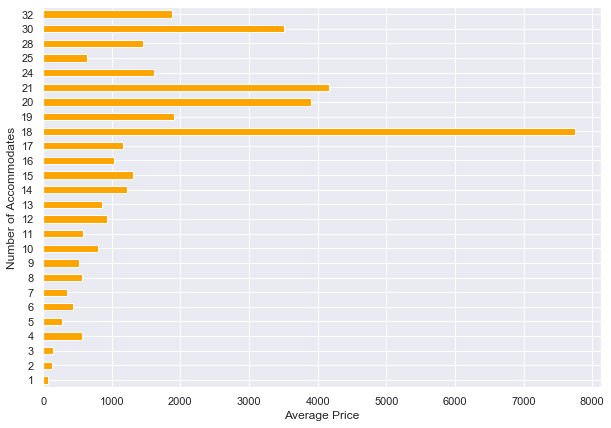

In [59]:
plt.figure(figsize=(10,7))
accommodates_mean.plot.barh(color='orange')
plt.xlabel('Average Price')
plt.ylabel('Number of Accommodates')

<b>How does review_scores_rating relate to price?</b>

(-3, 103)

<Figure size 28800x28800 with 0 Axes>

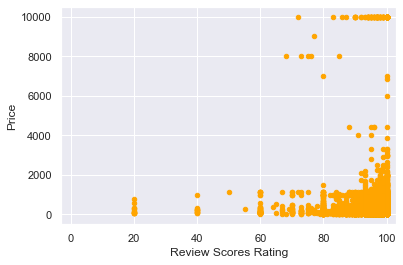

In [60]:
# Subset only listings that have a review_scores_rating of more than -1 (the flagged value)
new_df = df[df['review_scores_rating'] > -1]

# Plot the distribution
plt.figure(figsize=(400,400))
new_df.plot.scatter('review_scores_rating','price', color='orange')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.xlim(-3, 103)

reviews_scores_rating doesn't seem to have too much of an affect on the price, although there are several higher prices in the 10,000 range that tend to have higher ratings.

<b>How does review_scores_rating relate to number_of_bookings?</b>

(-3, 103)

<Figure size 28800x28800 with 0 Axes>

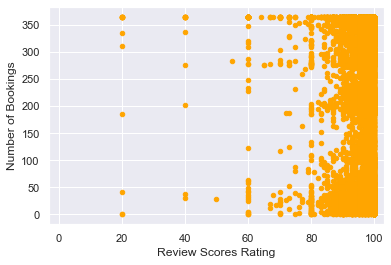

In [61]:
plt.figure(figsize=(400,400))
new_df.plot.scatter('review_scores_rating','number_of_bookings', color='orange')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Bookings')
plt.xlim(-3, 103)

reviews_scores_rating doesn't seem to have an affect on the number_of_bookings at all. It looks like there are many listings with a high review score and nearly zero bookings. Most of the bookings are above 80%. 

<b>What is the distribution of review_scores_rating?</b>

(-3, 103)

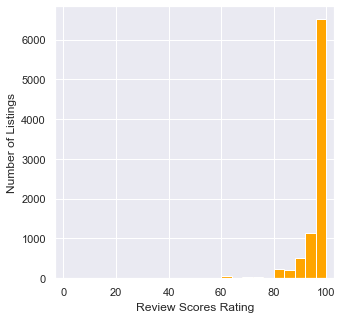

In [62]:
plt.figure(figsize=(5,5))
plt.hist(new_df['review_scores_rating'], color='orange', bins=20)
plt.ylabel('Number of Listings')
plt.xlabel('Review Scores Rating')
plt.xlim(-3, 103)

Most of the review_scores_rating is over 90. 

<b>What's the distribution of minimum nights?</b>

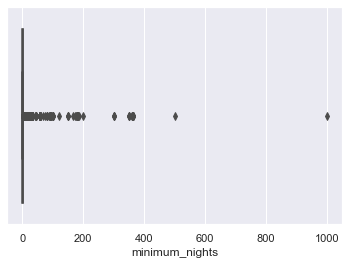

In [63]:
sns.boxplot(df['minimum_nights'], color='orange')

There are too many outliers in the number of minimum_nights column. I will use the describe function to determine where the bulk of the data lies for minimum_nights.

In [64]:
df['minimum_nights'].describe(percentiles = [0.25, 0.5, 0.75, 0.90])

count    11333.000000
mean         5.084002
std         20.228365
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
90%          5.000000
max        999.000000
Name: minimum_nights, dtype: float64

Most of the listings have under 5 for minimum_nights. I will plot only listings with less than 5 minimum_nights.

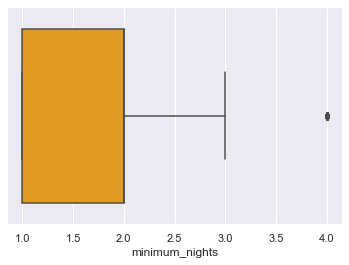

In [65]:
# Select only values below the 90% percentile
minimum_nights = df[df['minimum_nights'] < 5]

# Plot the values
sns.boxplot(minimum_nights['minimum_nights'], color='orange')

Most of the listings require a booking of 1 or 2 minimum nights.

<b>Does minimum_nights affect number_of_bookings?</b>

Text(0, 0.5, 'Number of Bookings')

<Figure size 28800x28800 with 0 Axes>

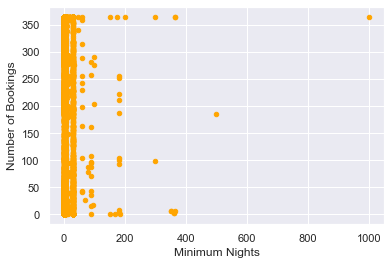

In [66]:
plt.figure(figsize=(400,400))
new_df.plot.scatter('minimum_nights','number_of_bookings', color='orange')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Bookings')

It does not seem that minimum_nights affects the number_of_bookings. There are many listings that have low booking percentage and low minimum_nights. Most of the listings seem to require less than 50 minimum nights.

<b>How does bedroom_bath_ratio relate to price?</b>

Text(0, 0.5, 'Price')

<Figure size 28800x28800 with 0 Axes>

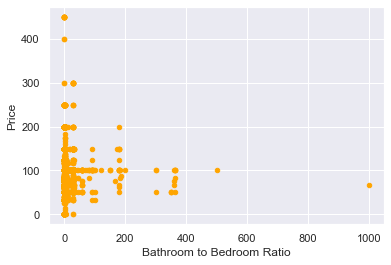

In [67]:
plt.figure(figsize=(400,400))
new_df = df[df['bedroom_bath_ratio'] > -1]
new_df.plot.scatter('minimum_nights','bedroom_bath_ratio', color='orange')
plt.xlabel('Bathroom to Bedroom Ratio')
plt.ylabel('Price')

The bathroom to bedroom ratio doesn't seem to have a direct relation with price.

<b>How does bedroom_bath_ratio relate to the number_of_bookings?</b>

Text(0, 0.5, 'Number of Bookings')

<Figure size 28800x28800 with 0 Axes>

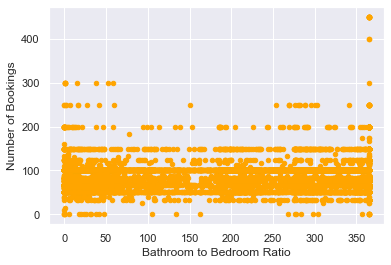

In [68]:
plt.figure(figsize=(400,400))
new_df = df[df['bedroom_bath_ratio'] > -1]
new_df.plot.scatter('number_of_bookings','bedroom_bath_ratio', color='orange')
plt.xlabel('Bathroom to Bedroom Ratio')
plt.ylabel('Number of Bookings')

There seems to be no direct relation between the bathroom to bedroom ratio and price.

<b>What is the distribution of bedroom_bath_ratio?</b>

Text(0.5, 0, 'Bathroom to Bedroom Ratio')

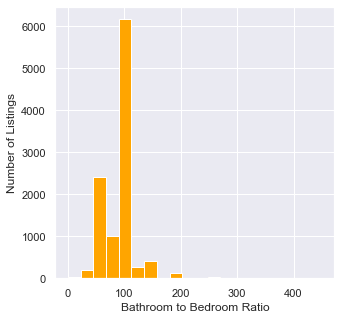

In [69]:
plt.figure(figsize=(5,5))
plt.hist(new_df['bedroom_bath_ratio'], color='orange', bins=20)
plt.ylabel('Number of Listings')
plt.xlabel('Bathroom to Bedroom Ratio')

It looks like most listings fall around the 1:1 for bathroom to bedroom ratio.

<b>How is price distributed on the map (by neighborhoods)?</b>

In [70]:
# Get the filepath and load in a shapefile
map_df = gpd.read_file('Data/neighbourhoods.geojson')

# Change the neighbourhood data type to int to match with the data type in the second data frame
map_df['neighbourhood'] = map_df['neighbourhood'].astype(int)

# Set the neighbourhood column as the index
map_df = map_df.set_index('neighbourhood')

# Check data type so we can see that this is a GEOdataframe, not a normal dataframe
map_df.head()

neighbourhood_group  \
neighbourhood                       
78739                        None   
78754                        None   
78732                        None   
78737                        None   
78756                        None   

                                                        geometry  
neighbourhood                                                     
78739          MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...  
78754          MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...  
78732          MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...  
78737          MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...  
78756          MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...

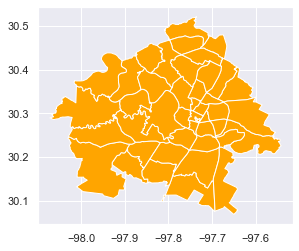

In [71]:
# Inspect the map function is working
map_df.plot(color='orange')

In [72]:
# Get a subset of the dataframe, columns neighbourhood and price
subset_df = df[['zip_code', 'price']]

# Rename column for joining dataframes later
subset_df.rename(columns = {'zip_code':'neighbourhood'}, inplace = True)

# Inspect the head of the subset dataframe
subset_df.head()

/Users/ammadatuy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


neighbourhood  price
0          78702  225.0
1          78702  100.0
2          78702   95.0
3          78702  130.0
4          78702  821.0

In [73]:
# Get mean for the price
data_for_map = subset_df.groupby('neighbourhood')['price'].mean().to_frame()
data_for_map

# Merge the two dataframes
merged = map_df.join(data_for_map, on='neighbourhood')

# Inspect the merged dataframe
merged.head()

neighbourhood_group  \
neighbourhood                       
78739                        None   
78754                        None   
78732                        None   
78737                        None   
78756                        None   

                                                        geometry       price  
neighbourhood                                                                 
78739          MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...  391.657895  
78754          MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...  121.303030  
78732          MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...  725.886792  
78737          MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...  335.990196  
78756          MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...  541.794872

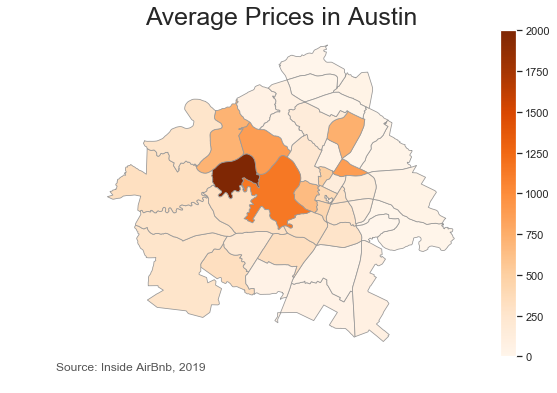

In [74]:
# Set the range for the choropleth
vmin, vmax = 0, 2000

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Remove axes
ax.axis('off')

# Add a title
ax.set_title('Average Prices in Austin', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create an annotation for the data source
ax.annotate('Source: Inside AirBnb, 2019', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Add the colorbar to the figure
cbar = fig.colorbar(sm)

# Create map and display
plot = merged.plot(column='price', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.6')
plot